In [1]:
from Portfolio import ALL_WEATHER, BERNSTEIN
from Portfolio import *
from PortfolioConfig import *

# 1. Running example portfolios

In [2]:
all_weather_df = ALL_WEATHER.generate_df()
all_weather_df

,date,snp500,us_bonds,inter_us_bonds,gold,commodities
0,2007-01-11,1423.82,88.45,99.92,60.63,22.65
1,2007-01-12,1430.73,88.04,99.93,62.17,23.18
2,2007-01-16,1431.90,88.20,99.83,61.97,22.65
3,2007-01-17,1430.62,87.96,99.82,62.64,22.85
4,2007-01-18,1426.37,88.23,99.91,62.26,22.61
...,...,...,...,...,...,...
4285,2024-01-22,4850.43,94.65,116.58,187.22,22.03
4286,2024-01-23,4864.60,93.90,116.45,187.95,22.15
4287,2024-01-24,4868.55,93.35,116.26,186.40,22.34
4288,2024-01-25,4894.16,93.96,116.64,187.14,22.51


In [3]:
all_weather_weights = ALL_WEATHER.generate_weights()
all_weather_weights

,snp500,us_bonds,inter_us_bonds,gold,commodities
0,0.3,0.4,0.15,0.075,0.075


In [4]:
all_weather_consolidated = ALL_WEATHER.generate_consolidated()
all_weather_consolidated

,date,all_weather
0,2007-01-11,1695.47
1,2007-01-12,1704.05
2,2007-01-16,1704.55
3,2007-01-17,1703.89
4,2007-01-18,1699.38
...,...,...
4285,2024-01-22,5270.91
4286,2024-01-23,5285.05
4287,2024-01-24,5286.90
4288,2024-01-25,5314.41


In [5]:
bernstein_df = BERNSTEIN.generate_df()
bernstein_df

,date,us_bonds,snp500,foreign_large_cap,us_small_cap
0,2007-07-26,87.03,1482.66,47.90,71.25
1,2007-07-27,87.28,1458.95,47.17,69.60
2,2007-07-30,87.03,1473.91,47.96,70.82
3,2007-07-31,87.66,1455.27,47.90,69.95
4,2007-08-01,87.13,1465.81,48.10,70.31
...,...,...,...,...,...
4150,2024-01-22,94.65,4850.43,46.90,210.66
4151,2024-01-23,93.90,4864.60,46.82,209.92
4152,2024-01-24,93.35,4868.55,47.11,208.29
4153,2024-01-25,93.96,4894.16,47.23,209.83


In [6]:
bernstein_weights = BERNSTEIN.generate_weights()
bernstein_weights

,us_bonds,snp500,foreign_large_cap,us_small_cap
0,0.25,0.25,0.25,0.25


In [7]:
bernstein_consolidated = BERNSTEIN.generate_consolidated()
bernstein_consolidated

,date,bernstein
0,2007-07-26,1688.84
1,2007-07-27,1663.00
2,2007-07-30,1679.72
3,2007-07-31,1660.78
4,2007-08-01,1671.35
...,...,...
4150,2024-01-22,5202.64
4151,2024-01-23,5215.24
4152,2024-01-24,5217.30
4153,2024-01-25,5245.18


# 2. Using with backtest engine

In [8]:
import sys
sys.path.insert(0, '..')
from backtest.backtest import Backtest

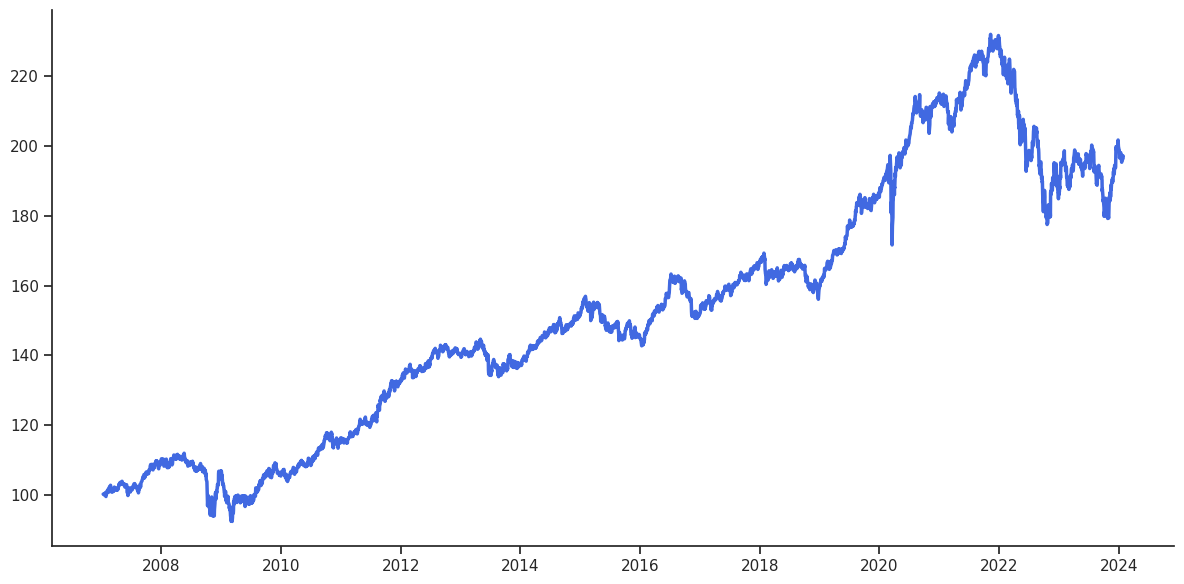

Sharpe Ratio: 0.16820096634141732
Max Drawdown: -0.23465859915173562
PnL: 0.9705288964799212
Beta: nan


In [9]:
# Running all weather with all data.
ALL_WEATHER.backtest(Backtest())

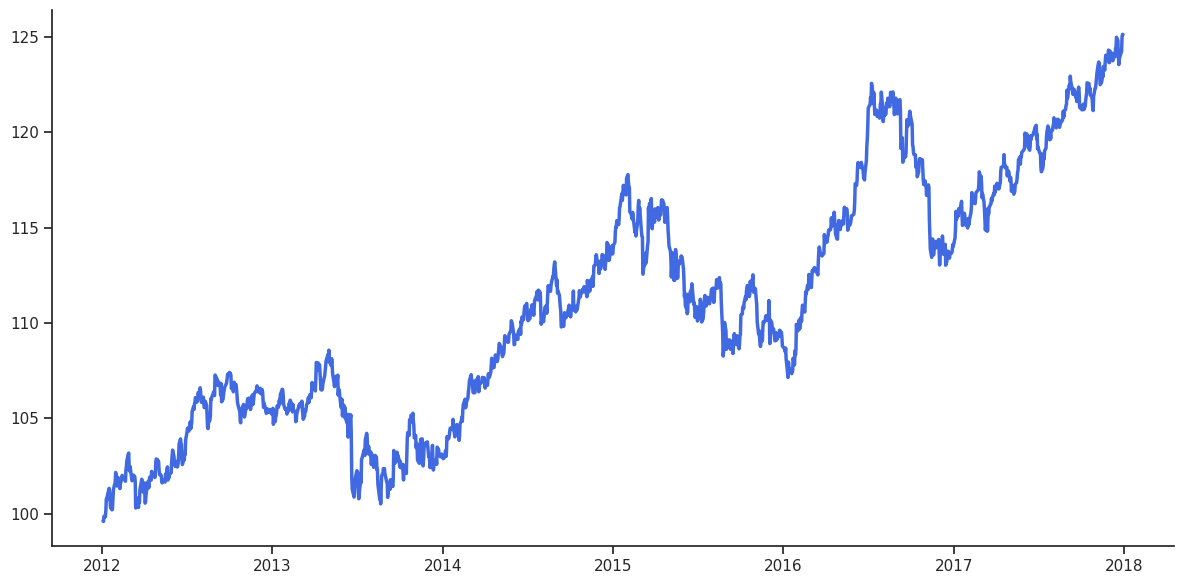

Sharpe Ratio: 0.1643269548432514
Max Drawdown: -0.09030349020109746
PnL: 0.2512301536567594
Beta: nan


In [10]:
# Running all weather with a from 2012 to 2018 only
ALL_WEATHER.backtest(Backtest(), start="2012-01-01", end="2018-01-01")

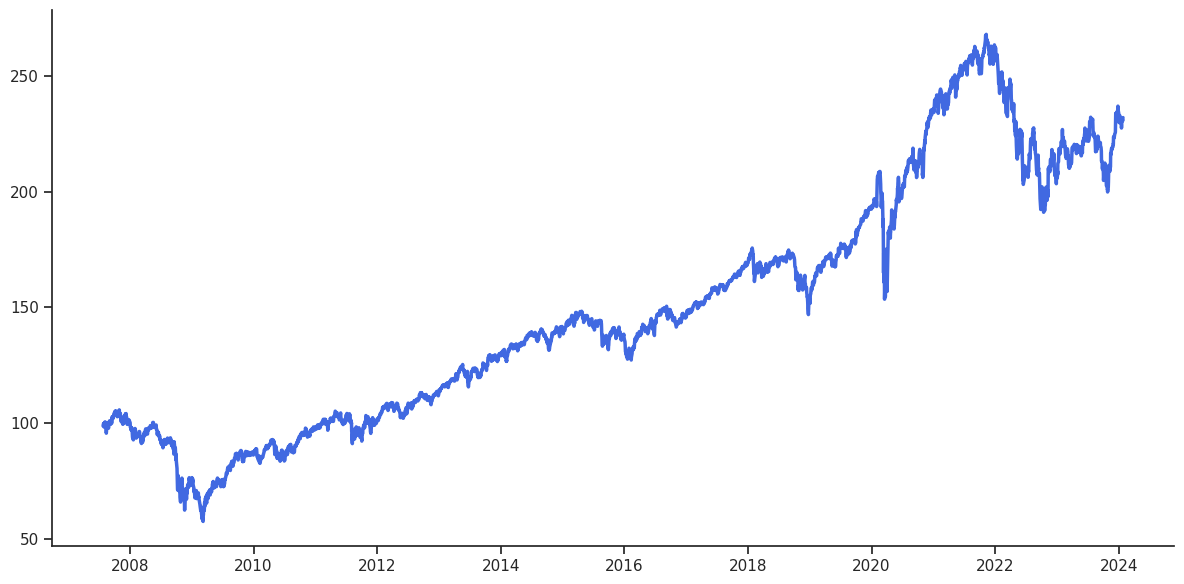

Sharpe Ratio: 0.20748795034626377
Max Drawdown: -0.45637473636137615
PnL: 1.3199844851662088
Beta: nan


In [11]:
BERNSTEIN.backtest(Backtest())

# 3. using portfolio with WRDS non-downloaded data

In [12]:
# We set download=False if want to run a portfolio but not download the data from WDRS to our local directory.

test_config = PortfolioConfig("test", {
    "snp500" : 0.5, # This is a downloaded data already available on ./data
    "GOOG" : 0.5 # This is not a downloaded data
}, download=False) 

WRDS recommends setting up a .pgpass file.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [13]:
# Create portfolio
test_portfolio = Portfolio(test_config)

In [14]:
test_df = test_portfolio.generate_df()
test_df

,date,snp500,GOOG
0,2014-03-27,1849.04,558.46
1,2014-03-28,1857.62,559.99
2,2014-03-31,1872.34,556.97
3,2014-04-01,1885.52,567.16
4,2014-04-02,1890.90,567.00
...,...,...,...
2471,2024-01-22,4850.43,147.71
2472,2024-01-23,4864.60,148.68
2473,2024-01-24,4868.55,150.35
2474,2024-01-25,4894.16,153.64


In [15]:
df1 = test_config.downloaded["GOOG"]
date_series = pd.to_datetime(df1["datadate"])
price = df1["prccd"]
r1 = pd.DataFrame(
        {"date" : date_series, "goog" : price})
df2 = pd.read_csv("../data/snp500.csv")
date_series = pd.to_datetime(df2["datadate"])
price = df2["prccd"]
r2 = pd.DataFrame(
        {"date" : date_series, "snp" : price})

In [16]:
r1

,date,goog
0,2014-03-27,558.46
1,2014-03-28,559.99
2,2014-03-31,556.97
3,2014-04-01,567.16
4,2014-04-02,567.00
...,...,...
2474,2024-01-25,153.64
2475,2024-01-26,153.79
2476,2024-01-29,154.84
2477,2024-01-30,153.05


In [17]:
r1.dtypes

date    datetime64[ns]
goog           float64
dtype: object

In [18]:
r2

,date,snp
0,1984-02-10,156.30
1,1984-02-13,154.95
2,1984-02-14,156.61
3,1984-02-15,156.25
4,1984-02-16,156.13
...,...,...
10096,2024-01-22,4850.43
10097,2024-01-23,4864.60
10098,2024-01-24,4868.55
10099,2024-01-25,4894.16


In [19]:
r2.dtypes

date    datetime64[ns]
snp            float64
dtype: object

## 

In [20]:
base = pd.merge(r1, r2, how = "inner", on = "date")
base.tail(100)

,date,goog,snp
2376,2023-09-05,136.71,4496.83
2377,2023-09-06,135.37,4465.48
2378,2023-09-07,136.20,4451.14
2379,2023-09-08,137.20,4457.49
2380,2023-09-11,137.74,4487.46
...,...,...,...
2471,2024-01-22,147.71,4850.43
2472,2024-01-23,148.68,4864.60
2473,2024-01-24,150.35,4868.55
2474,2024-01-25,153.64,4894.16


In [21]:
# We set download=False if want to run a portfolio but not download the data from WDRS to our local directory.
# NOTE: wrds data source does not take into account stock splits

test_config = PortfolioConfig("test", {
    "snp500" : 0.5, # This is a downloaded data already available on ./data
    "GOOG" : 0.5 # This is not a downloaded data
}, download=False) 

WRDS recommends setting up a .pgpass file.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [22]:
# Create portfolio
test_portfolio = Portfolio(test_config)
test_df = test_portfolio.generate_df()
test_df

,date,snp500,GOOG
0,2014-03-27,1849.04,558.46
1,2014-03-28,1857.62,559.99
2,2014-03-31,1872.34,556.97
3,2014-04-01,1885.52,567.16
4,2014-04-02,1890.90,567.00
...,...,...,...
2471,2024-01-22,4850.43,147.71
2472,2024-01-23,4864.60,148.68
2473,2024-01-24,4868.55,150.35
2474,2024-01-25,4894.16,153.64


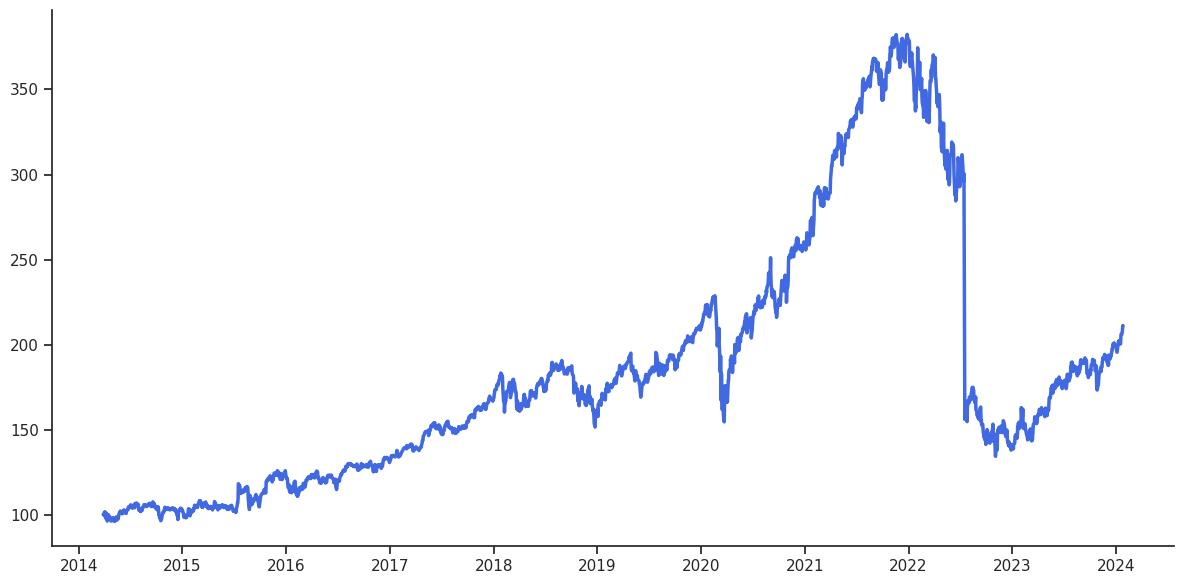

Sharpe Ratio: 0.3316660691474757
Max Drawdown: -0.6478686282397983
PnL: 1.1135266711692888
Beta: nan


In [23]:
test_portfolio.backtest(Backtest())